# Algorithmic Complexity

Profiling (e.g. with `timeit`) doesn’t tell us much about how an algorithm will perform on a different computer since it is determined by the hardware features. To compare performance in a device-indpendent fashion, a formalism (a.k.a the "Big-O") is used that characterizes functions in terms of their rates of growth as a function of the size *n* of the input.

An algorithm is compared to a given function $g(n)$ with a well defined scaling with *n*, e.g. $n^2$; if the ratio of the two is bounded, than that algorithm is ${\cal O}(g(n))$. Note that:
* Only the largest terms in the scaling of $g(n)$ is kept in the notation
* two algorithms can have the same complexity and have very different performance; the same complexity only implies that the difference in performance is independent of *n*.

### Comparing bubble sort ${\cal O}(n^2)$ and merge sort ${\cal O}(n\log{n})$




In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


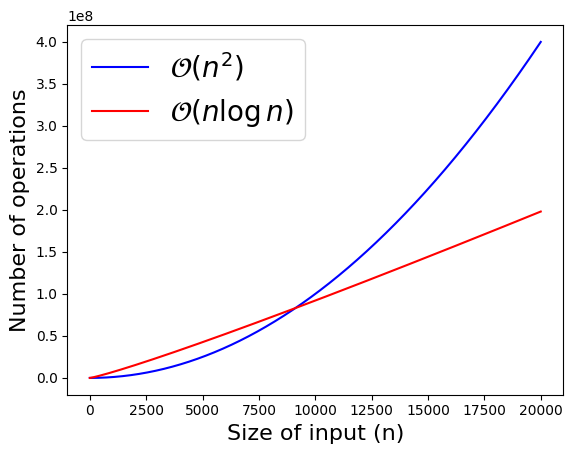

In [3]:
def f1(n, k):
    return k*n*n

def f2(n, k):
    return k*n*np.log(n)

n = np.arange(0.1, 20001)
plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);



See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that searching a list is much more expensive than searching a dictionary.

## Space Complexity

We can also use ${\cal O}$ notation in the same way to measure the space complexity of an algorithm.  The notion of space complexity becomes important when your data volume is of the same magnitude or larger than the memory you have available. In that case, an algorihtm with high space complexity may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest.

Just as you should have a good idea of how your algorithm will scale with increasing *n*, you should also be able to know how much memory your data structures will require. For example, if you had an $n\times p$ matrix of integers, an $n\times p$ matrix of floats, and an $n\times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them?

In [4]:
# Notice how much overhead Python objects have
# A raw integer should be 64 bits or 8 bytes only

import sys
print (sys.getsizeof(1))
print (sys.getsizeof(1234567890123456789012345678901234567890))
print (sys.getsizeof(3.14))
print (sys.getsizeof(3j))
print (sys.getsizeof('a'))
print (sys.getsizeof('hello world'))

28
44
24
32
50
60


In [5]:
print (np.ones((100,100), dtype='byte').nbytes)
print (np.ones((100,100), dtype='i2').nbytes)
print (np.ones((100,100), dtype='int').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='f4').nbytes)
print (np.ones((100,100), dtype='float').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='complex').nbytes)

10000
20000
80000
40000
80000
160000


# Scipy: high-level scientific computing

The `scipy` package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and `scipy` work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in `scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `scipy`’s routines are optimized and tested, and should therefore be used when possible.

# Linear algebra with scipy and numpy

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

We will review a few examples and applications. Sometimes numpy implements those methods too: if a given algorithm is present both in numpy and scipy, typically the latter is more performant.

In [6]:
import numpy as np
from scipy import linalg as la # Stays for Linear Algebra and is a scipy library
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)


In [7]:
# norm of a vector
v = np.array([1,2])
print (la.norm(v))

# distance between two vectors
w = np.array([1,1])
print (la.norm(v-w))

# inner products 
print (v.dot(w))



2.23606797749979
1.0
3


### Elaborate example: covariance matrix as outer product

The inner product is just matrix multiplication of a 1×n vector with an n×1 vector.
The outer product of two vectors is instead just the opposite. It is given by:

$$
v \otimes w=vw^t
$$

Note that $v$ and $w$ are column vectors. The result of the inner product is a scalar. The result of the outer product is a matrix.

**Linear algebra is so relevant, because it deals with matrices**

In [8]:
print (np.outer(v,w))

[[1 1]
 [2 2]]


In [9]:
# generate 4 sequences of 10 random numbers (flat between 0 and 1)
n, p = 10, 4
v = np.random.random((p,n))
v

array([[0.5081, 0.6246, 0.5925, 0.7101, 0.643 , 0.1828, 0.4991, 0.2465,
        0.7408, 0.4757],
       [0.8834, 0.1768, 0.2996, 0.6436, 0.8576, 0.5235, 0.1449, 0.1668,
        0.935 , 0.482 ],
       [0.684 , 0.3382, 0.4498, 0.1681, 0.7985, 0.1416, 0.1759, 0.9669,
        0.7857, 0.1988],
       [0.1132, 0.5242, 0.5964, 0.5608, 0.8843, 0.8146, 0.6803, 0.9077,
        0.238 , 0.4069]])

In [10]:
np.cov(v) 
# Evalueating the covariance matrixes
# In the outer diagonal terms one has the correlations
# Loo kin the internet the definition of the covariance

array([[ 0.0341,  0.0228,  0.0031, -0.0226],
       [ 0.0228,  0.0962,  0.0307, -0.038 ],
       [ 0.0031,  0.0307,  0.0975,  0.0009],
       [-0.0226, -0.038 ,  0.0009,  0.0703]])

In [11]:
# Abf one can do the same in computing the covariance matrix

# compute the mean of each sequence and set the right shape
v_mean= v.mean(1)[:, np.newaxis]
print (v_mean)

# re-center each sequence around its mean
w = v - v_mean
print (w)

# compute the covariance matrix
cov=w.dot(w.T)/(n - 1)
print (cov)

[[0.5223]
 [0.5113]
 [0.4707]
 [0.5726]]
[[-0.0142  0.1023  0.0702  0.1878  0.1207 -0.3396 -0.0232 -0.2758  0.2185
  -0.0466]
 [ 0.3721 -0.3345 -0.2117  0.1322  0.3463  0.0122 -0.3664 -0.3445  0.4236
  -0.0293]
 [ 0.2133 -0.1325 -0.021  -0.3027  0.3278 -0.3292 -0.2948  0.4962  0.3149
  -0.2719]
 [-0.4594 -0.0484  0.0237 -0.0118  0.3117  0.242   0.1076  0.3351 -0.3346
  -0.1658]]
[[ 0.0341  0.0228  0.0031 -0.0226]
 [ 0.0228  0.0962  0.0307 -0.038 ]
 [ 0.0031  0.0307  0.0975  0.0009]
 [-0.0226 -0.038   0.0009  0.0703]]


### Traces and determinants

In [12]:
# And one can evaluate the determinant and trace of the matrix
n = 6
M = np.random.randint(100,size=(n,n))
print(M,'\n')
print ('determinant:',la.det(M),'\n')
print ('trace:',M.trace(),'\n')

[[24 12 45 33  6 81]
 [29 76 34 11 32 61]
 [89 10 44 68  6 77]
 [70 22 70 76 29 42]
 [89 93 39 20  8 79]
 [13 28 71 55 34 10]] 

determinant: 5024800836.000008 

trace: 238 



## Matrix Decomposition

Often data analysis problems boil down to solving linear systems. An example is the [Netflix Competition](https://en.wikipedia.org/wiki/Netflix_Prize), where a matrix of $400000\times18000$ (ratings times movies) needed to be dealt with. **Then, we need to be smart even in doing calculations in linear algebra**

Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

### Lower-Upper factorization

Let A be a square matrix. An LU factorization refers to the factorization of A, with proper row and/or column orderings or permutations, into two factors – a lower triangular matrix L and an upper triangular matrix U:

$A=LU$

**Sometimes it is easier to save the matrix in a triangolar matrix, such that the moltiplication of the two is easier**

when solving a system of linear equations, $Ax=b=LUx$, the solution is done in two logical steps:
1. solve $Ly=b$ for $y$.
2. solve $Ux=y$ for $x$.

Often a permutation $P$ is needed (*partial pivoting*) to best reorder the rows of the original matrix



In [13]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])
print(A,'\n')

P, L, U = la.lu(A)
print(np.dot(P.T, A),'\n')
print(np.dot(L, U),'\n')
print(P,'\n')
print(L,'\n')
print(U,'\n')

[[1 3 4]
 [2 1 3]
 [4 1 2]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[1.     0.     0.    ]
 [0.25   1.     0.    ]
 [0.5    0.1818 1.    ]] 

[[4.     1.     2.    ]
 [0.     2.75   3.5   ]
 [0.     0.     1.3636]] 



### Eigendecomposition

Given an $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist n  linearly independent eigenvectors and $A$ may be decomposed in the following manner:

$$ 
A=V\Lambda V^{-1}
$$

where $\Lambda$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $V$ are the corresponding eigenvectors of $A$.

Eigenvalues are roots of the *characteristic polynomial* of $A$:

$$
\det{(A-\lambda I)}=0
$$

**In scipy these operations are done by built-in functions, which are optimized yet**

In [14]:
A = np.array([[0,1,1],[2,1,0],[3,4,5]])
print (A)
print(la.det(A),'\n')


l, V = la.eig(A)
print (V)
print (l)
print(np.real_if_close(l)) # returns a real number if its imaginary part is close to zero

[[0 1 1]
 [2 1 0]
 [3 4 5]]
-5.0 

[[ 0.1802  0.6721  0.    ]
 [ 0.0743 -0.7249 -0.7071]
 [ 0.9808  0.1509  0.7071]]
[ 5.8541+0.j -0.8541+0.j  1.    +0.j]
[ 5.8541 -0.8541  1.    ]


In [32]:
print(np.dot(V,np.dot(np.diag(np.real_if_close(l)), la.inv(V))),'\n')
# This is the proof of the eigenvalue decomposition VDV^+

[[0.651  0.2186]
 [0.2186 0.2121]] 



### Singular Value Decomposition

**This is another way of dealing with the decomposition of a matrix, when it is not a squared matix (but a $n \times m$ matrix)**

Another important matrix decomposition is singular value decomposition or SVD. For any $m\times n$ matrix $A$, we may write:

$$A=UDV^T$$

where $U$ is a orthogonal $m\times m$ matrix, $D$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative, $V$ is an orthogonal $n\times n$ matrix.

The singular-value decomposition is a generalization of the eigendecomposition in the sense that it can be applied to any $m \times n$ matrix whereas eigenvalue decomposition can only be applied to diagonalizable matrices. 

Given an SVD of $A$, as described above, the following holds:

$$
A^T A = VD^TU^T UDV^T = VD^TDV^T 
$$
$$
A A^T = UD^TV^T VDU^T = UD^TDU^T 
$$

The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently:
* The columns of V (right-singular vectors) are eigenvectors of $A^TA$.
* The columns of U (left-singular vectors) are eigenvectors of $AA^T$.
* The non-zero elements of D (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^TA$ or $AA^T$.

**One can geometrically see this from the previous equations**

A geometrical representation of SVD is given by the following figure:

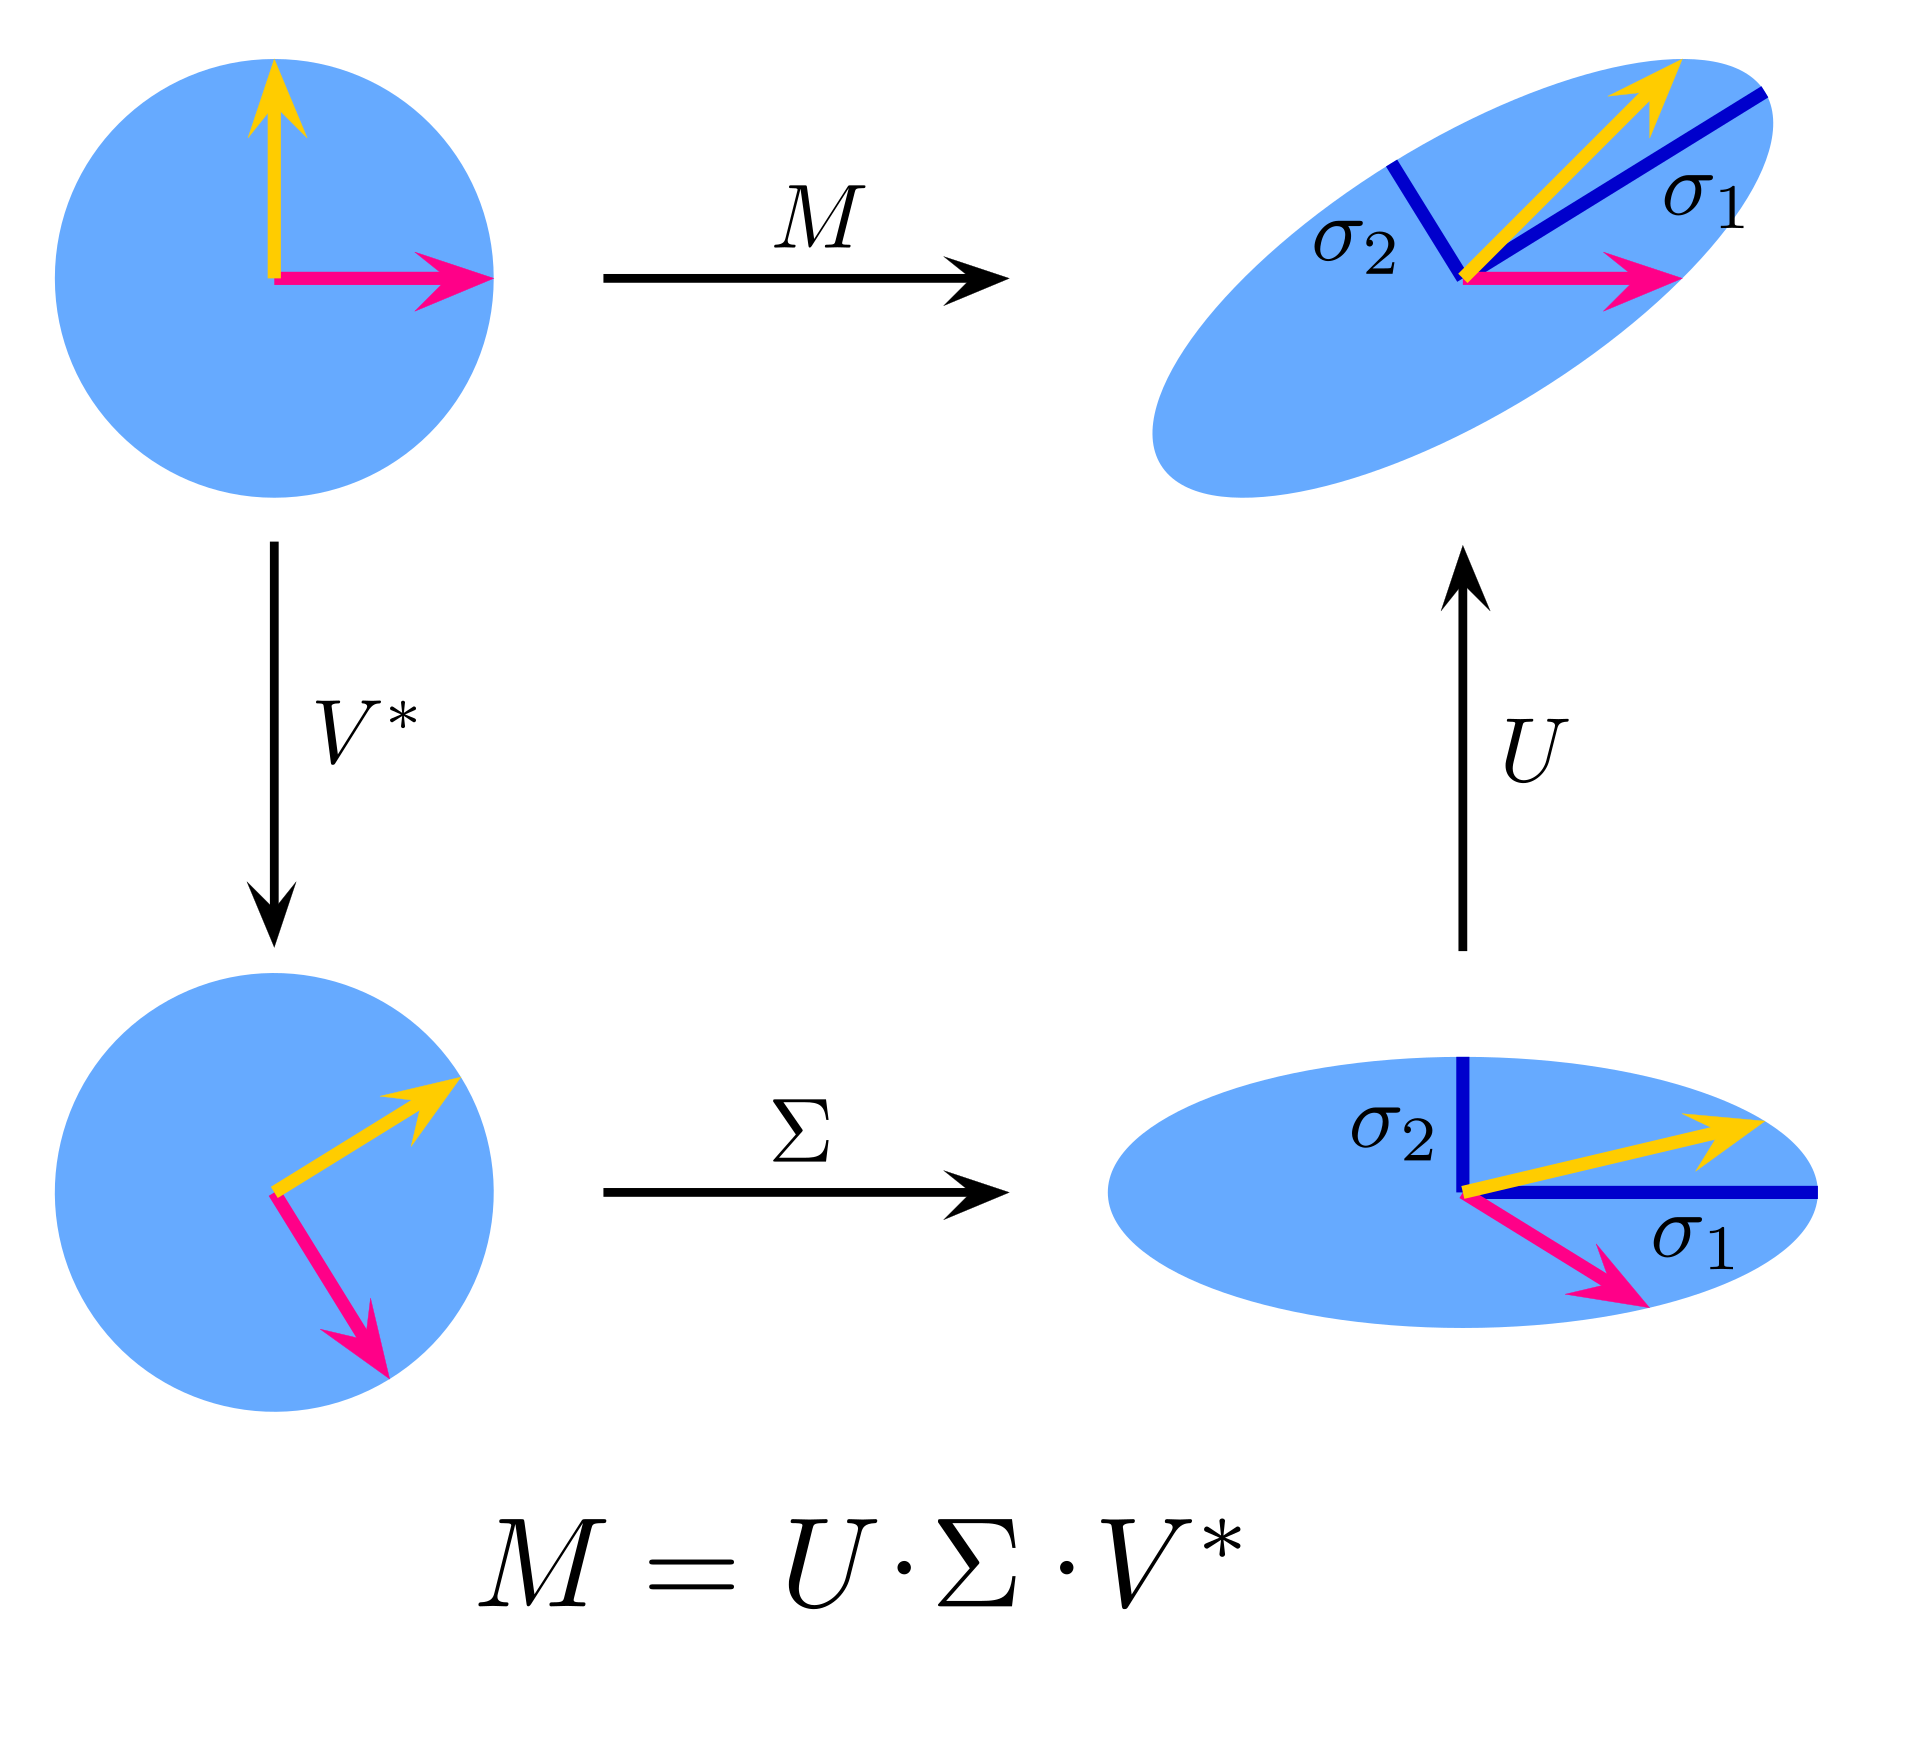

In [16]:
# Visualization of the operation
from IPython.display import Image
Image("Singular-Value-Decomposition.png")

In [34]:
m, n = 5, 4
A = np.random.randn(m, n) #+ 1.j*np.random.randn(m, n)
print (A,'\n')

U, spectrum, Vt = la.svd(A) # It gives in output: U, D (as a vector with the diagonal elements), V^T in this order

print("shapes:", U.shape,  spectrum.shape, Vt.shape)

print (spectrum,'\n')
print (U,'\n')
print (Vt,'\n')

[[-0.389   1.3068 -1.4735  0.7557]
 [-0.1873 -0.9504 -0.1583  0.101 ]
 [-0.7237  1.7279 -1.1464  0.1127]
 [-1.3909  0.221  -0.8454  0.7576]
 [-0.3993 -0.8165 -1.2492 -0.3146]] 

shapes: (5, 5) (4,) (4, 4)
[3.3231 1.9128 1.0427 0.6162] 

[[-0.6263 -0.0683  0.1888  0.7519  0.0469]
 [ 0.1131  0.4682 -0.1078  0.2164 -0.8424]
 [-0.6322 -0.2653  0.1927 -0.5738 -0.4044]
 [-0.4263  0.4184 -0.7534 -0.1425  0.2351]
 [-0.1169  0.7285  0.5899 -0.1957  0.2634]] 

[[ 0.3971 -0.607   0.6428 -0.2465]
 [-0.3879 -0.7816 -0.4877  0.028 ]
 [ 0.5943  0.0326 -0.5581 -0.5782]
 [ 0.582  -0.1401 -0.1937  0.7773]] 



In [18]:
# Let's verify the definition of SVD property by hand
D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))
print (SVD)
np.allclose(SVD, A) # Checks element per element


[[ 0.301  -0.1981  0.4981  0.1424]
 [ 0.9098 -0.2642 -2.859   0.1681]
 [ 0.9322 -0.3006  2.5682 -0.0018]
 [ 1.3937 -1.3063 -0.5631  0.9929]
 [-1.2053 -1.7482  1.3881  2.0613]]


True

Clearly scipy provide already a "solve" method for the linear systems of the type:

$$A x = b $$

still, knowing a little bit what are the algorithms underneath comes handy sometimes, e.g. the solve method can be instructed about what kind of matrix $A$ is likely to be (symmetric, hermitian, positive definite, etc.)

**Sometimes it is easier to solve equations in our own way instead of using the built-in functions**

In [19]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
print (x)


[ 2. -2.  9.]


In [20]:
np.dot(A, x) == b
# Creates a vector of bool in order to check if the two are identical


array([ True,  True,  True])

# Principal Component Analysis 

Principal Components Analysis (PCA) aims at finding and ranking all the eigenvalues and eigenvectors of a given dataset's covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

**Basically the idea is that we only care of variables with big variance, because the more the variance is small, the lower its influence on the system. One wants to reduce the dimension of the system witha a small loss of information**

Numerically, PCA can be done either by means of eigendecomposition on the covariance matrix or via SVD on the data matrix. Even though the latter is usually preferred, let's have a look first at the former.

To start with let's recall the definition of the covariance matrix (of 2 variables):

$$
{\rm Cov}(X,Y)=\frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
$$

with ${\rm Cov}(X,X)$ the variance of the variable $X$.

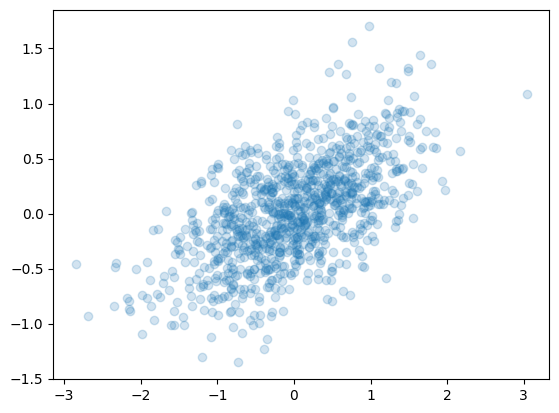

In [21]:
# construct a dataset with a skewed 2D distribution
mu = [0,0] # <== zero mean! useful for later
sigma = [[0.6,0.2],[0.2,0.2]] # asymmetric sigmas, given in the form of a covariance matrix (which is symmetric by definintion)
n = 1000
X = np.random.multivariate_normal(mu, sigma, n).T

plt.scatter(X[0,:], X[1,:], alpha=0.2)

In [22]:
# the covariance matrix
np.cov(X)
# One should in principle find the former covariance matrix: as defined in "sigma"

array([[0.651 , 0.2186],
       [0.2186, 0.2121]])

In [23]:
# now find the eigenvectors of the covariance matrix..
#l, V = np.linalg.eig(np.cov(X))
l, V = la.eig(np.cov(X))

print (l)
print (V)

# First recall that V is an orthogonal matrix (and thus its transpose is also its inverse)
V.dot(V.T)

[0.7413+0.j 0.1218+0.j]
[[ 0.9242 -0.3818]
 [ 0.3818  0.9242]]


array([[ 1., -0.],
       [-0.,  1.]])

(0.7413060607034926+0j) [0.9242 0.3818]
(0.12175822757725273+0j) [-0.3818  0.9242]


/home/giosue/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


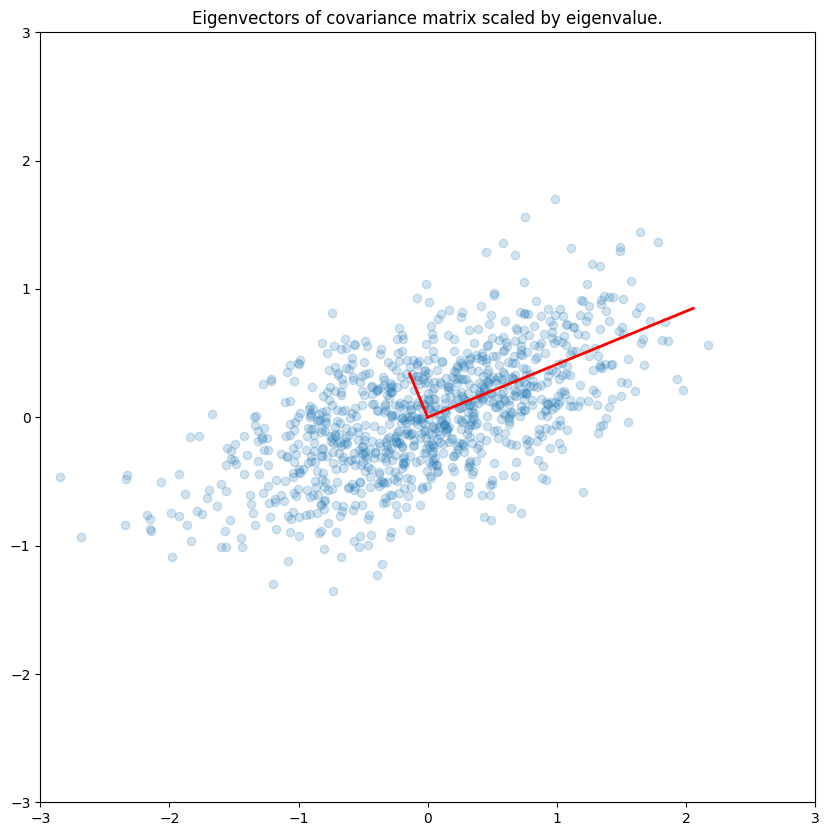

In [24]:
plt.figure(figsize=(10,10))
# the original data distribution
plt.scatter(X[0,:], X[1,:], alpha=0.2)

# a scale factor to emphazise the lines 
scale_factor=3

# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');

# Eigenvectors are the basis vectors in which the matrix is diagonal
# Vectors are of the lenght of the eigenvalue

In the case the features of the datasets have all zero mean, the covariance matrix is of the form:

$$
{\rm Cov}(X)=\frac{XX^T}{n-1}
$$

and thus

[0.7413 0.1221]
[[ 0.9243 -0.3817]
 [ 0.3817  0.9243]]


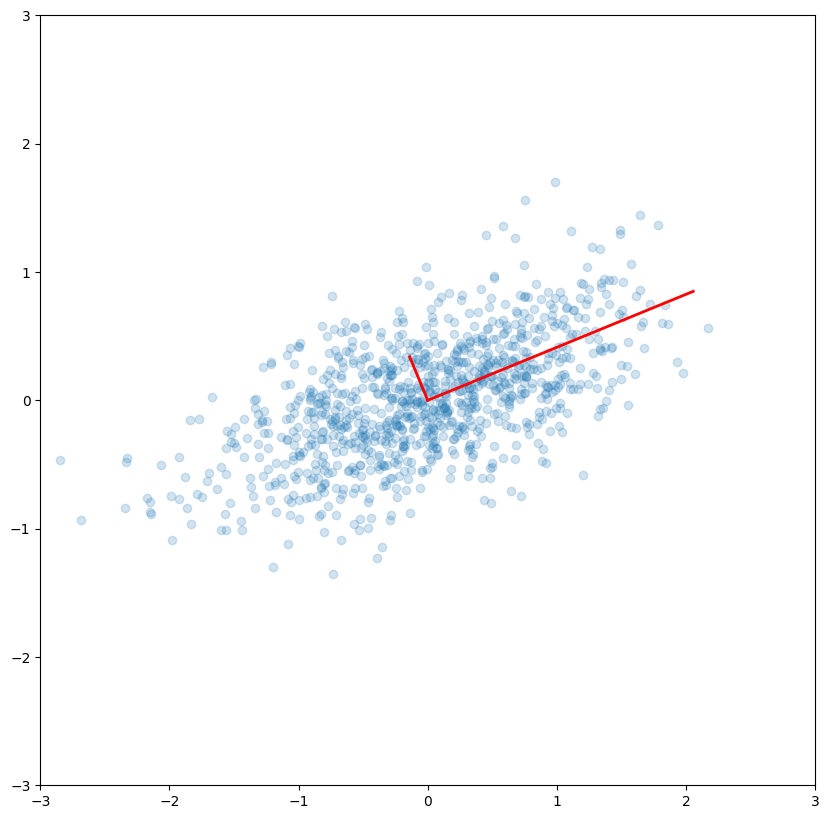

In [25]:
l0, V0 = np.linalg.eig(np.dot(X, X.T)/(n-1))
print (l0)
print (V0)

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);


We can now use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis.

In [26]:
# rotate all the data points accordingly to the new base
Xp = np.dot(V0.T, X)
# One can rotate the data in order to have the diagonal basis orthogonal to the axis

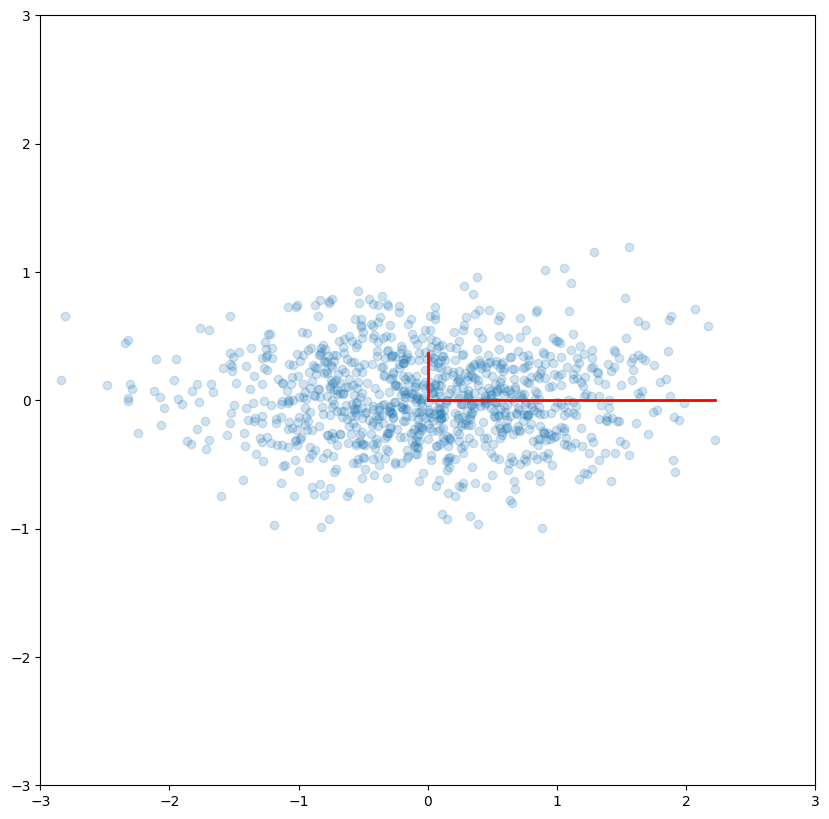

In [27]:
# then plot the rotated dataset and its "axes" # Which are rotated as just described
plt.figure(figsize=(10,10))
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l0, np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

For example, if we only use the first column of $xp$, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data with a single featrue that is a linear combination of the original features.

**After the rotation, one can select the data with the higher variance and drop all the others**

We may need to transform the (reduced) data set to the original feature coordinates for interpreation. This is simply another linear transform (matrix multiplication).

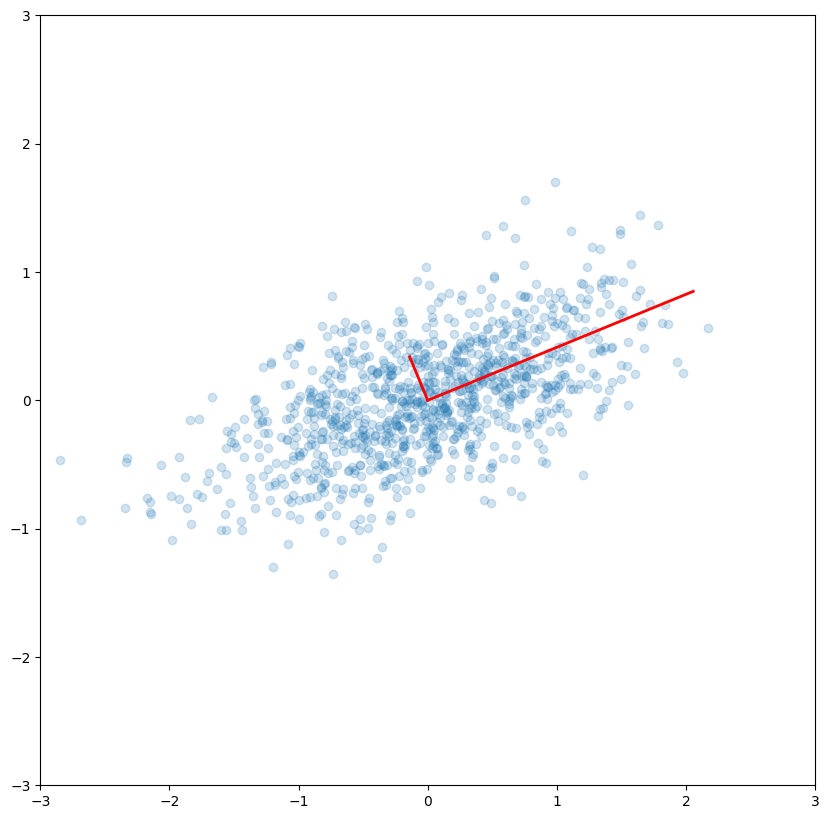

In [28]:
plt.figure(figsize=(10,10))
Xpp = np.dot(V0, Xp)
plt.scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

## Dimension reduction via PCA


Given the spectral decomposition:

$$ 
A=V\Lambda V^{-1}
$$

with $\Lambda$ of rank $p$. Reducing the dimensionality to $k<p$ simply means setting to zero all but the first $k$ diagonal values (ordered from the largest to the smaller in module; that is the default in numpy/scipy).

In this way we catch the most relevant part of its variability (covariance).

In [29]:
l, V = np.linalg.eig(np.cov(X))
Lambda=np.diag(l)
print (Lambda)
print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())

# One then keeps the 86% of the initial variance, with very easier computations

[[0.7413 0.    ]
 [0.     0.1218]]
A.trace(): 0.8630642882807453
Lambda.trace(): 0.8630642882807453
0.8589233395118231


Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) 90% fo the total variability is exlained.

## SVD for PCA

**With are here are two options:**
- **perform a SVD of the original dataset (matrix of columns=variables, rows=data, which is completely not diagonal)**
- **perform a diagonalization on the covariance matrix, which is $XX^T$ for a shifted dataset**

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where U and V are orthogonal matrices and D is a diagnonal matrix.


Compare with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $D^2$ (scaled by n−1).

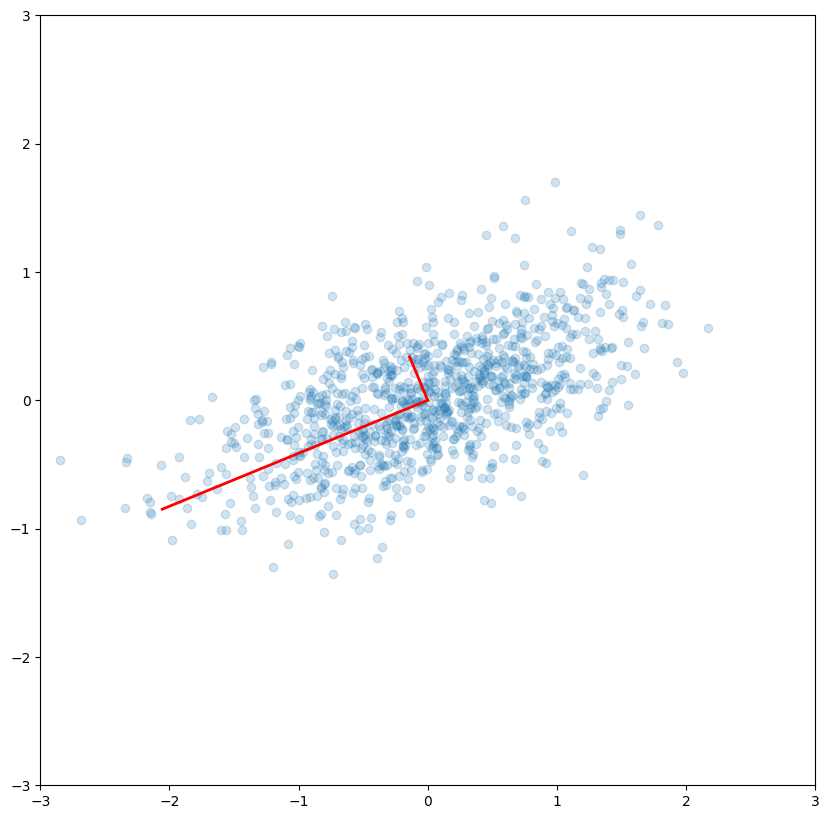

In [30]:
U, spectrum, Vt = np.linalg.svd(X)

l_svd = spectrum**2/(n-1)
V_svd = U

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l_svd, V_svd):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);


In [31]:
print ("eigendecomposition:",l)
print ("SVD:",l_svd)

eigendecomposition: [0.7413 0.1218]
SVD: [0.7413 0.1221]
